<a href="https://colab.research.google.com/github/VanshJain36/loan-prediction-and-sales-analysis/blob/main/loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import plotly.express as px
%matplotlib inline

In [ ]:
# Load the dataset
file_path = "/content/apna_database.csv"
df = pd.read_csv(file_path)
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
# Drop 'Id' as it is not useful for prediction
df.drop(columns=['Id'], inplace=True)

In [ ]:
# Encode categorical variables
categorical_cols = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
# Split data into features and target variable
X = df.drop(columns=['Risk_Flag'])
y = df['Risk_Flag']

In [ ]:
# Normalize numerical features
scaler = StandardScaler()
X[['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']] = scaler.fit_transform(
    X[['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']]
)

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict on test data
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.5700
              precision    recall  f1-score   support

           0       0.60      0.68      0.64        56
           1       0.51      0.43      0.47        44

    accuracy                           0.57       100
   macro avg       0.56      0.56      0.55       100
weighted avg       0.56      0.57      0.56       100



In [ ]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,33,214,13,3,13,0
1,7574516,40,10,1,2,0,43,195,14,9,13,0
2,3991815,66,4,0,2,0,47,7,12,4,10,0
3,6256451,41,2,1,2,1,43,43,17,2,12,1
4,5768871,47,11,1,2,0,11,247,22,3,14,1


In [ ]:
# spliting the data set into fearures (x) and target variables(y)
x= df[['Profession']] #independent variable
y= df[['Income']] #dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

x_train.shape, x_test.shape

((399, 1), (100, 1))

In [ ]:
# spliting the data set into fearures (x) and target variables(y)
x= df[['Profession']] #independent variable
y= df[['Income']] #dependent variable

# Convert 'Profession' to numerical using one-hot encoding
x = pd.get_dummies(x, columns=['Profession'], drop_first=True) # drop_first to avoid multicollinearity

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

x_train.shape, x_test.shape

((399, 50), (100, 50))

In [ ]:
# creatring and training the simple regression model
model=LinearRegression()
model.fit(x_train, y_train)

#display model parimeters
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

Intercept: [5470244.25]
Coefficient: [-2424054.58333333    25198.41666667  1015151.15         964221.17857143
  1490148.24999999   110633.11363636  2766222.41666667  -760625.41666666
   685563.25          77806.15         319073.15         186136.89285714
  -379221.625       -103429.5         -645428.15         139566.93181818
  3412816.24999999   -42912.91666667   -77012.39285714  -566863.65
 -1298406.41666667   213800.25         809367.89285715 -1384115.51666667
   418676.66666666  -292786.91666666  1058270.97222222 -2031187.87500001
    18115.55         652569.41666667 -2946459.25         -53368.71153846
 -1097369.5         1185393.02272727    75397.75000001  1438421.08333334
   864013.11363636 -2341050.44999999 -2027263.          -206800.69444444
   -26192.375       1311065.65        -864988.74999999   161016.58333333
 -1209941.25        -746120.91666667  -239276.16666667  1299969.95
   401115.25        -470234.41666667]


In [ ]:
y_pred=model.predict(x_test)
results = pd.DataFrame({'Actual Risk': y_test.values.ravel(), 'Predicted Risk': y_pred.ravel()}) # Changed y_pred to y_pred.ravel() to flatten the array.
results.head()

,Actual Risk,Predicted Risk
0,7467167,4.903381e+06
1,9585696,5.545642e+06
2,9999180,5.393232e+06
3,6694786,4.724123e+06
4,3562528,6.655637e+06


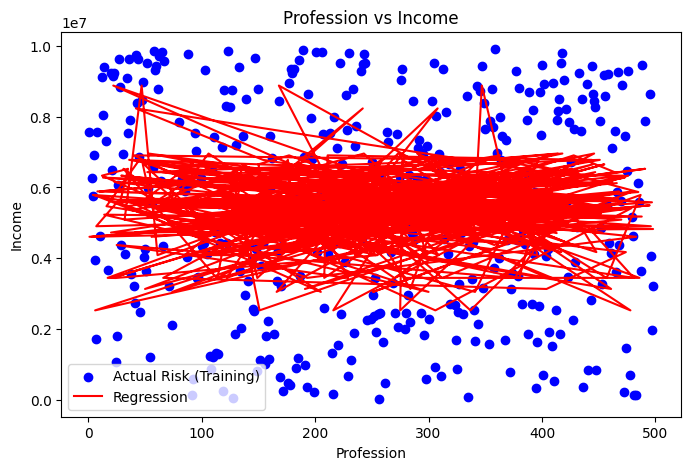

In [ ]:
# spliting the data set into fearures (x) and target variables(y)
x= df[['Profession']] #independent variable
y= df[['Income']] #dependent variable

# Convert 'Profession' to numerical using one-hot encoding
x = pd.get_dummies(x, columns=['Profession'], drop_first=True) # drop_first to avoid multicollinearity

# Assuming you want to use the same x_train and x_test for prediction:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# However, the model was trained with a different set of features,
# so you need to use the original X_train (or a dataframe with the same features) that
# was used when you trained the 'model' object.

# If you need to re-train your model using one-hot encoded features,
# re-fit it using x_train from the cell above:
# model.fit(x_train, y_train)

# Instead of using the original model, create a new LinearRegression model
# and train it with the one-hot encoded features.
model_onehot = LinearRegression()
model_onehot.fit(x_train, y_train)


plt.figure(figsize=(8, 5)) # Changed figsize to a tuple (width, height)
plt.scatter(x_train.index, y_train.values.ravel(), color='blue', label="Actual Risk (Training)") # Use x_train.index to get the index as x-axis

# Use the new model (model_onehot) for prediction with one-hot encoded data:
plt.plot(x_train.index, model_onehot.predict(x_train), color='red', label="Regression") # Use x_train.index for the plot as well

plt.xlabel('Profession')
plt.ylabel('Income')
plt.title('Profession vs Income')
plt.legend()
plt.show()

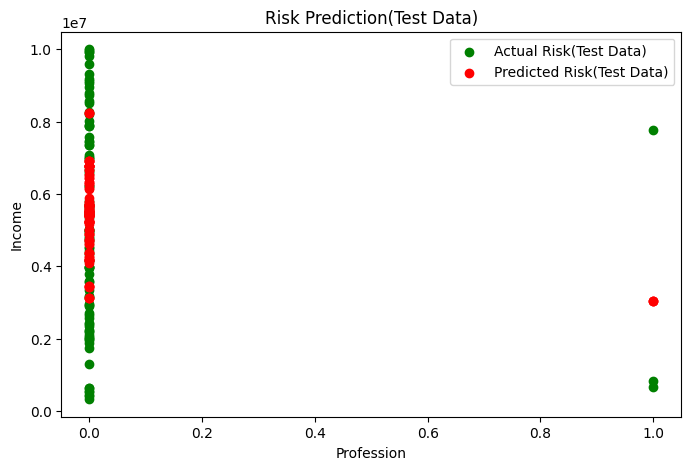

In [ ]:
plt.figure(figsize=(8,5))
# Extract a single relevant column for x-axis or use the original 'Profession' column before one-hot encoding.
# Here, I am assuming you want to plot against the first one-hot encoded column
plt.scatter(x_test.iloc[:, 0], y_test, color='green', label="Actual Risk(Test Data)")
plt.scatter(x_test.iloc[:, 0], y_pred, color='red', label="Predicted Risk(Test Data)")
plt.xlabel('Profession')
plt.ylabel('Income')
plt.title('Risk Prediction(Test Data)')
plt.legend()
plt.show()

In [ ]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("Mean Absolute Error (MAE):",{mae})
print("Mean Squared Error (MSE):",{mse})
print("R2 score: {r2}")

Mean Absolute Error (MAE): {2551472.4435474253}
Mean Squared Error (MSE): {8610569218400.206}
R2 score: {r2}


In [ ]:
print(df['Risk_Flag'].value_counts())

Risk_Flag
0    281
1    218
Name: count, dtype: int64


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")


In [ ]:
X.loc[:, 'Age'] = scaler.fit_transform(X[['Age']])


In [ ]:
print(np.unique(y_pred, return_counts=True))


(array([3046189.66666667, 3129193.80000001, 3439056.37499999,
       3442981.25      , 4086128.73333333, 4171837.83333333,
       4260303.        , 4372874.75      , 4605255.50000001,
       4709618.83333334, 4724123.33333333, 4903380.6       ,
       5000009.83333333, 5177457.33333334, 5230968.08333333,
       5263443.55555556, 5393231.85714286, 5416875.53846154,
       5427331.33333333, 5444051.875     , 5488359.8       ,
       5495442.66666667, 5545642.00000001, 5609811.18181818,
       5631260.83333333, 5656381.14285714, 5684044.5       ,
       5789317.4       , 5888920.91666666, 6122813.66666667,
       6155807.5       , 6279612.14285715, 6334257.36363636,
       6434465.42857143, 6528515.22222222, 6655637.27272727,
       6770214.2       , 6781309.9       , 6908665.33333334,
       8236466.66666667]), array([3, 3, 2, 2, 1, 5, 2, 3, 2, 1, 2, 3, 2, 1, 5, 2, 4, 5, 1, 1, 2, 5,
       4, 1, 1, 2, 6, 2, 1, 1, 1, 2, 2, 2, 2, 2, 4, 3, 4, 3]))


In [ ]:
# Assuming model is your trained RandomForestClassifier
# Fit the model before predicting
model.fit(X_train, y_train)

y_pred = model.predict(X_test) # Re-predict using the classifier

# Now y_pred should contain class labels (0 or 1)
print(classification_report(y_test, y_pred))

# Import confusion_matrix
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred)) # Now you can use confusion_matrix

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



              precision    recall  f1-score   support

       67428       0.00      0.00      0.00       0.0
      137594       0.00      0.00      0.00       0.0
      326455       0.00      0.00      0.00       1.0
      347930       0.00      0.00      0.00       0.0
      368667       0.00      0.00      0.00       0.0
      424671       0.00      0.00      0.00       1.0
      444242       0.00      0.00      0.00       1.0
      535157       0.00      0.00      0.00       1.0
      549476       0.00      0.00      0.00       1.0
      568591       0.00      0.00      0.00       0.0
      624985       0.00      0.00      0.00       0.0
      630441       0.00      0.00      0.00       1.0
      649902       0.00      0.00      0.00       1.0
      661573       0.00      0.00      0.00       1.0
      667848       0.00      0.00      0.00       0.0
      780090       0.00      0.00      0.00       0.0
      826681       0.00      0.00      0.00       1.0
      979926       0.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-p

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



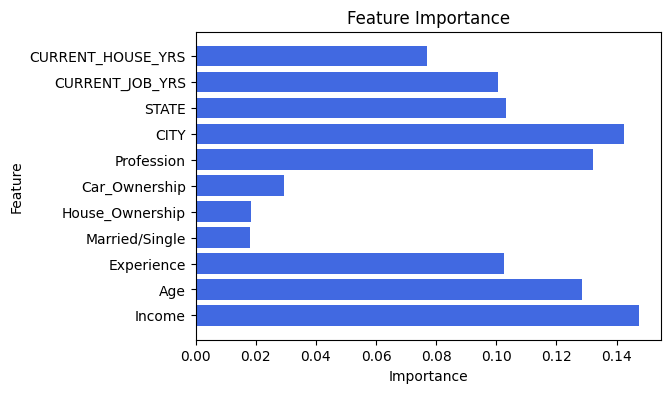

In [ ]:
#import matplotlib.pyplot as plt
#import numpy as np

# Ensure the model has been fitted before accessing feature_importances_
model.fit(X_train, y_train)  # Fit the model if it hasn't been fitted already

feature_importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(6, 4))
plt.barh(features, feature_importances, color='royalblue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

In [ ]:
# Load the dataset
file_path = "Loan Prediction.csv"
df = pd.read_csv(file_path)

# Encode 'Profession' column
le = LabelEncoder()
df['Profession'] = le.fit_transform(df['Profession'])

# Select only 'Profession' and 'Age' as independent variables and 'Risk_Flag' as target
X = df[['Profession', 'Age']]
y = df['Risk_Flag']

# Normalize numerical feature 'Age'
scaler = StandardScaler()
X['Age'] = scaler.fit_transform(X[['Age']])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Random Forest model with balanced class weights
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

# Function to predict risk based on user input
def predict_risk():
    profession_input = input("Enter profession: ")
    age_input = int(input("Enter age: "))

    if profession_input in le.classes_:
        profession_encoded = le.transform([profession_input])[0]
    else:
        print("Invalid profession. Please enter a valid one from the dataset.")
        return

    age_scaled = scaler.transform([[age_input]])[0][0]  # Scale the age input
    user_data = np.array([[profession_encoded, age_scaled]])
    prediction = model.predict(user_data)[0]

    if prediction == 1:
        print("High risk: Loan may not be approved.")
    else:
        print("Low risk: Loan is likely to be approved.")

# Take user input and predict
predict_risk()


<ipython-input-119-e511389faeb0>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Accuracy: 0.6855
              precision    recall  f1-score   support

           0       0.96      0.67      0.79     44201
           1       0.25      0.79      0.38      6199

    accuracy                           0.69     50400
   macro avg       0.60      0.73      0.58     50400
weighted avg       0.87      0.69      0.74     50400

Enter profession: Software_Developer
Enter age: 41
High risk: Loan may not be approved.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

